### ADR

Analyze results

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from env.custom_hopper import *
import gym
from mujoco_py import GlfwContext
import glfw
from stable_baselines3 import SAC

In [7]:
model_0_5 = SAC.load("AutoDR/SAC_steps_500000_lr_0.001_gamma_0.995_tau_0.01_ent_coef_auto_u_0.5_threshold_1000_callback_freq_100_adaptation_rate_0.005/model.zip")

model_1_0 = SAC.load("AutoDR/SAC_steps_1000000_lr_0.001_gamma_0.995_tau_0.01_ent_coef_auto/model.zip")

In [22]:
source_env = gym.make('CustomHopper-source-v0')
target_env = gym.make('CustomHopper-target-v0')

n_episodes = 50
seed = 1234

In [23]:
def get_reward(env, model, n_episodes, seed, verbose = True):
    reward_list = np.array([])

    for i in range(n_episodes):
        done = False
        env.seed(seed + i)
        state = env.reset()
        total_reward = 0
        step_count = 0

        while not done:
            action, _ = model.predict(state, deterministic=True)

            state, reward, done, _ = env.step(action)
            total_reward += reward
            step_count += 1

        if verbose:
            print(f"Episode {i} reward: {total_reward} in total {step_count} steps")

        reward_list = np.append(reward_list, total_reward)

    return (reward_list)

In [24]:
rewards_0_5_source = get_reward(source_env, model_0_5, n_episodes, seed)
rewards_0_5_target = get_reward(target_env, model_0_5, n_episodes, seed)

rewards_1_0_source = get_reward(source_env, model_1_0, n_episodes, seed)
rewards_1_0_target = get_reward(target_env, model_1_0, n_episodes, seed)

Episode 0 reward: 1423.5465247253958 in total 500 steps


Episode 1 reward: 1424.287968438798 in total 500 steps
Episode 2 reward: 1422.107799100926 in total 500 steps
Episode 3 reward: 1423.4258859215931 in total 500 steps
Episode 4 reward: 1419.2392172710615 in total 500 steps
Episode 5 reward: 1421.2428490179095 in total 500 steps
Episode 6 reward: 1422.6084836898722 in total 500 steps
Episode 7 reward: 1421.0002253699652 in total 500 steps
Episode 8 reward: 1422.6737533542287 in total 500 steps
Episode 9 reward: 1420.3779981179234 in total 500 steps
Episode 10 reward: 1421.7107825643575 in total 500 steps
Episode 11 reward: 1421.7437815516712 in total 500 steps
Episode 12 reward: 1421.9397021421544 in total 500 steps
Episode 13 reward: 1421.6668456594316 in total 500 steps
Episode 14 reward: 1420.4475309511658 in total 500 steps
Episode 15 reward: 1422.2004394982357 in total 500 steps
Episode 16 reward: 1420.9646111489349 in total 500 steps
Episode 17 reward: 1423.0311768643355 in total 500 steps
Episode 18 reward: 1422.111851952948 in to

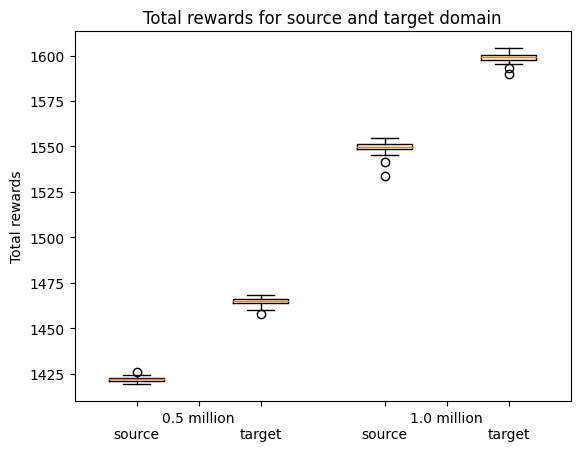

In [26]:
# pliot boxplot of rewards

plt.boxplot([rewards_0_5_source, rewards_0_5_target, rewards_1_0_source, rewards_1_0_target], positions=[1, 2, 3, 4])

plt.xticks([1, 1.5, 2, 3, 3.5, 4], ['\nsource', '0.5 million', '\ntarget', '\nsource', '1.0 million', '\ntarget'])
# set y limits
# plt.ylim(1200, 1800)

plt.ylabel('Total rewards')
plt.title('Total rewards for source and target domain')
plt.show()
plt.savefig('ADR.png')
